# Optimal Tuning Parameters


Review of K-fold cross-validation

Review of parameter tuning using cross_val_score

More efficient parameter tuning using GridSearchCV

Searching multiple parameters simultaneously

Using the best parameters to make predictions

Reducing computational expense using RandomizedSearchCV

1. Review of K-fold cross-validation

Steps for cross-validation:

Dataset is split into K "folds" of equal size

Each fold acts as the testing set 1 time, and acts as the training set K-1 times

Average testing performance is used as the estimate of out-of-sample performance

Also known as cross-validated performance
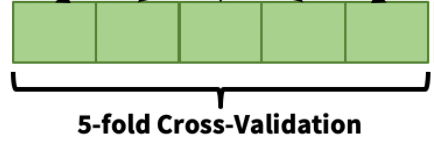
Benefits of cross-validation:

More reliable estimate of out-of-sample performance than train/test split

Reduce the variance of a single trial of a train/test split



2. Review of parameter tuning using cross_val_score

Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

To select the best value of k for KNN model to predict species

In [1]:
# imports 
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

print('X matrix dimensionality:', X.shape)
print('Y vector dimensionality:', y.shape)

X matrix dimensionality: (150, 4)
Y vector dimensionality: (150,)


In [6]:
# 10-fold (cv=10) cross-validation with K=5 (n_neighbors=5) for KNN (the n_neighbors parameter)

# instantiate model
knn = KNeighborsClassifier(n_neighbors=5)

# store scores in scores object
# scoring metric used here is 'accuracy' because it's a classification problem
# cross_val_score takes care of splitting X and y into the k folds that's 
#why we pass X and y entirely instead of X_train and y_train
scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
print(scores)

## CV=3
# Split1 b1 b2 b3 - fit Xtrain B1 , b2 , Xtest b3 accuracy (bP,b3) S1
# Split1 b1 b2 b3 - fit Xtrain b1 , b3 , Xtest b2 accuracy (bP,b2) S2
# Split1 b1 b2 b3 - fit Xtrain b2 , b3 , Xtest b1 accuracy (bP,b1) S3




[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [7]:
# use average accuracy as an estimate of out-of-sample accuracy

# scores is a numpy array so we can use the mean method
print(scores.mean())

0.9666666666666668


In [4]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1, 31)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0, 0.5, 'Cross-Validated Accuracy')

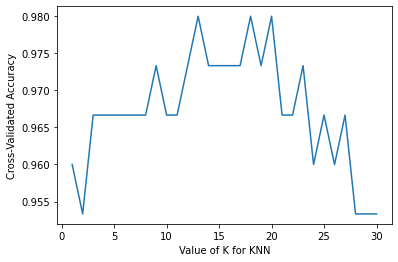

In [6]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# 3. More efficient parameter tuning using GridSearchCV¶

Allows you to define a grid of parameters that will be searched using K-fold cross-validation

This is like an automated version of the "for loop" above

In [11]:
from sklearn.model_selection import GridSearchCV


In [12]:
# define the parameter values that should be searched
# for python 2, k_range = range(1, 31)
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [13]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [24]:
# instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

Grid object is ready to do 10-fold cross validation on a KNN model using classification accuracy as the evaluation metric

In addition, there is a parameter grid to repeat the 10-fold cross validation process 30 times

Each time, the n_neighbors parameter should be given a different value from the list

We can't give GridSearchCV just a list

We've to specify n_neighbors should take on 1 through 30

You can set n_jobs = -1 to run computations in parallel (if supported by your computer and OS)

This is also called parallel programming

In [25]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

KNN model is being fit and predictions are being made 30 x 10 = 300 times

In [26]:
# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

KNeighborsClassifier(n_neighbors=13)


# 4. Searching multiple parameters simultaneously



In [27]:
# define the parameter values that should be searched
k_range = list(range(1, 31))

# Another parameter besides k that we might vary is the weights parameters
# default options --> uniform (all points in the neighborhood are weighted equally)
# another option --> distance (weights closer neighbors more heavily than further neighbors)

# we create a list
weight_options = ['uniform', 'distance']

In [28]:
# create a parameter grid: map the parameter names to the values that should be searched
# dictionary = dict(key=values, key=values)
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [32]:
# instantiate and fit the grid
# exhaustive grid-search because it's trying every combination
# 10-fold cross-validation is being performed 30 x 2 = 60 times

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=30),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [34]:
# examine the best model

print(grid.best_params_)

0.9800000000000001
{'n_neighbors': 13, 'weights': 'uniform'}


5. Using the best parameters to make predictions¶


In [37]:
# train your model using all data and the best known parameters

# instantiate model with best parameters
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')

# fit with X and y, not X_train and y_train
# even if we use train/test split, we should train on X and y before making predictions on new data
# otherwise we throw away potential valuable data we can learn from
knn.fit(X, y)



KNeighborsClassifier(n_neighbors=13)

In [41]:
import numpy as np

# Now you van make a prediction 
knn.predict()

# TP appliquer le tuning parameter sur le churn dataset with Decision trees

In [46]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
custchurn = pd.read_csv('custchurn.csv')

In [47]:

#let us encode it to int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #encode your data
custchurnNum=custchurn.apply(string_to_int.fit_transform) #fit and transform it
y = custchurnNum.churn
custchurnNum.drop(['churn','Unnamed: 0'], axis=1, inplace=True)
X=custchurnNum
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
from sklearn import tree
model_tree  = tree.DecisionTreeClassifier()
model_tree.fit(X_train, y_train) 
model_tree.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
X

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,16,127,1,0,1,20,1723,74,1723,896,62,792,1352,54,709,80,3,80,1
1,35,106,1,0,1,21,791,87,791,877,66,776,1442,66,753,117,3,117,1
2,31,136,1,0,0,0,1561,78,1561,216,73,203,559,67,340,102,5,102,0
3,35,83,0,1,0,0,1898,35,1898,19,51,19,894,52,494,46,7,46,2
4,36,74,1,1,0,0,838,77,838,428,85,390,795,84,449,81,3,81,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,136,0,1,0,0,1926,74,1926,1226,36,1074,205,41,156,86,2,86,1
4996,47,72,0,0,0,0,939,82,939,1584,47,1383,1325,75,696,103,2,103,3
4997,28,139,2,0,0,0,1571,79,1571,1483,64,1296,1228,75,649,55,6,55,1
4998,3,96,2,0,0,0,1630,53,1630,1862,54,1642,1462,30,762,68,5,68,1


In [49]:
##For KNN
## define the parameter values that should be searched
#k_range = list(range(1, 31))
## Another parameter besides k that we might vary is the weights parameters
## default options --> uniform (all points in the neighborhood are weighted equally)
## another option --> distance (weights closer neighbors more heavily than further neighbors)
## we create a list
#weight_options = ['uniform', 'distance']

#For decision tree
param_dict={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [50]:
grid=GridSearchCV(model_tree,
                 param_grid=param_dict,
                 cv=10,
                 verbose=1,
                 n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 2920 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 5720 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:  1.1min finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [51]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 6}

In [52]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=6)

In [53]:
grid.best_score_

0.945111111111111

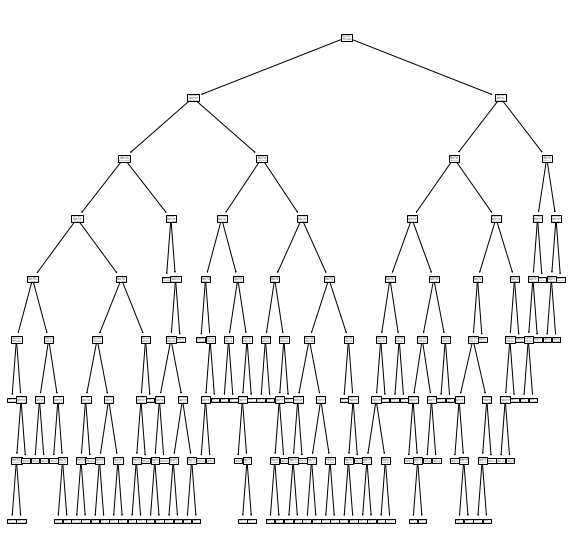

In [54]:
import matplotlib.pyplot as plt
#model_tree  = tree.DecisionTreeClassifier(criterion='gini',max_depth=9)
model_tree  = tree.DecisionTreeClassifier(criterion='entropy',max_depth=8)
model_tree.fit(X_train, y_train)
# Visualisation de l'arbre
plt.figure(figsize =(10,10))
tree.plot_tree(model_tree)
plt.show()

In [55]:
with open("tree.dot", 'w') as f:
    f = tree.export_graphviz(model_tree, out_file=f, filled=True)

In [56]:
from sklearn.metrics import confusion_matrix

y_pred_train=model_tree.predict(X_train)
cm=confusion_matrix(y_train, y_pred_train)
print(cm)

[[3848    5]
 [  94  553]]


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train, )

0.978

In [58]:
0.978

0.978